# Data collection

In [28]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [29]:
#  Load the data
file_path = '../data/Week2_challenge_data_source.xlsx'
data = pd.read_excel(file_path)

In [30]:
# Save the loaded data to CSV for further access
data.to_csv('../data/cleaned_week2_challenge_data_source.csv', index=False)

# Reload the cleaned CSV data
df = pd.read_csv('../data/cleaned_week2_challenge_data_source.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [31]:
df.shape

(150001, 55)

# Data Cleaning

In [11]:
# Fill missing values in numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [12]:
# Fill missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
# Handle missing values in unique identifiers
unique_identifiers = ['IMEI', 'IMSI', 'MSISDN/Number']
for col in unique_identifiers:
    df[col] = df[col].fillna('Unknown')

In [14]:
# Drop columns with more than 50% missing values
threshold = 0.5
cols_to_drop = [col for col in df.columns if (df[col].isnull().mean() > threshold)]
df = df.drop(columns=cols_to_drop)

In [15]:
# Save the cleaned data
df.to_csv('../data/cleaned_week2_challenge_data_source_final.csv', index=False)

In [34]:
# Aggregation per user
user_data = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',   # Number of xDR sessions
    'Dur. (ms)': 'sum',     # Total session duration
    'Total DL (Bytes)': 'sum',   # Total download data
    'Total UL (Bytes)': 'sum'    # Total upload data
}).rename(columns={
    'Bearer Id': 'number_of_xDR_sessions',
    'Dur. (ms)': 'total_session_duration',
    'Total DL (Bytes)': 'total_download_data',
    'Total UL (Bytes)': 'total_upload_data'
})

# Save aggregated user data to CSV
user_data.to_csv('../data/user_aggregated_data.csv')
user_data.head()

,number_of_xDR_sessions,total_session_duration,total_download_data,total_upload_data
MSISDN/Number,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0


# Exploratory Data Analysis

In [18]:
# Reload the cleaned and aggregated data
df = pd.read_csv('../data/cleaned_week2_challenge_data_source_final.csv')
user_data = pd.read_csv('../data/user_aggregated_data.csv')

In [19]:
# Describe all relevant variables and associated data types
df.describe(include='all')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001,150001,150001.000000,150001,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
unique,134709,111881,NaN,100962,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,,2019-04-29 07:08:38,NaN,2019-04-25 00:01:32,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,991,15,NaN,66,NaN,NaN,NaN,NaN,NaN,1233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,499.188199,NaN,498.800888,1.046084e+05,2.082016e+14,4.182441e+10,4.842592e+13,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,NaN,NaN,288.610872,NaN,288.096693,8.103736e+04,2.144723e+10,2.438731e+12,2.238739e+13,NaN,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08
min,NaN,NaN,0.000000,NaN,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,NaN,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,NaN,NaN,250.000000,NaN,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,NaN,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,NaN,NaN,499.000000,NaN,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,NaN,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,NaN,NaN,749.000000,NaN,750.000000,1.324300e+05,2.082018e+14,3.368307e+10,8.611970e+13,NaN,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08


In [20]:
# Variable transformations - Segment users into deciles based on total session duration
user_data['decile_class'] = pd.qcut(user_data['total_session_duration'], 10, labels=False)

# Compute total data (DL+UL) per decile class
decile_data = user_data.groupby('decile_class').agg({
    'total_download_data': 'sum',
    'total_upload_data': 'sum'
})

print(decile_data)

              total_download_data  total_upload_data
decile_class                                        
0                    4.989842e+12       4.494350e+11
1                    5.604102e+12       5.053079e+11
2                    5.992652e+12       5.437496e+11
3                    5.533562e+12       5.006783e+11
4                    4.716541e+12       4.271904e+11
5                    5.893111e+12       5.333005e+11
6                    5.646430e+12       5.056693e+11
7                    7.169970e+12       6.522641e+11
8                    8.535968e+12       7.702898e+11
9                    1.411479e+13       1.280337e+12


In [21]:
# Analyze basic metrics
print(df[['Total DL (Bytes)', 'Total UL (Bytes)']].describe())

       Total DL (Bytes)  Total UL (Bytes)
count      1.500010e+05      1.500010e+05
mean       4.546434e+08      4.112121e+07
std        2.441421e+08      1.127635e+07
min        7.114041e+06      2.866892e+06
25%        2.431072e+08      3.322203e+07
50%        4.558411e+08      4.114331e+07
75%        6.657051e+08      4.903424e+07
max        9.029696e+08      7.833131e+07


In [22]:
# Conduct a Non-Graphical Univariate Analysis
print(df[['Total DL (Bytes)', 'Total UL (Bytes)']].agg(['mean', 'median', 'std', 'var']))

        Total DL (Bytes)  Total UL (Bytes)
mean        4.546434e+08      4.112121e+07
median      4.558411e+08      4.114331e+07
std         2.441421e+08      1.127635e+07
var         5.960535e+16      1.271560e+14


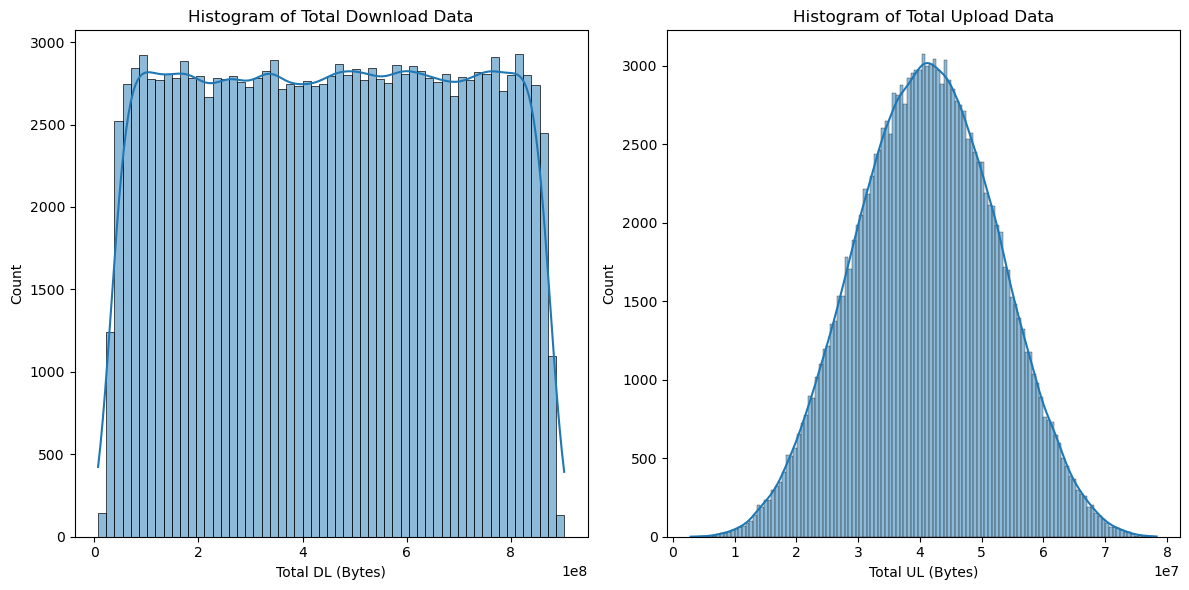

In [23]:
#  Conduct a Graphical Univariate Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total DL (Bytes)'], kde=True)
plt.title('Histogram of Total Download Data')

plt.subplot(1, 2, 2)
sns.histplot(df['Total UL (Bytes)'], kde=True)
plt.title('Histogram of Total Upload Data')

plt.tight_layout()
plt.show()

c:\Users\getac\anaconda3\envs\enve-week2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


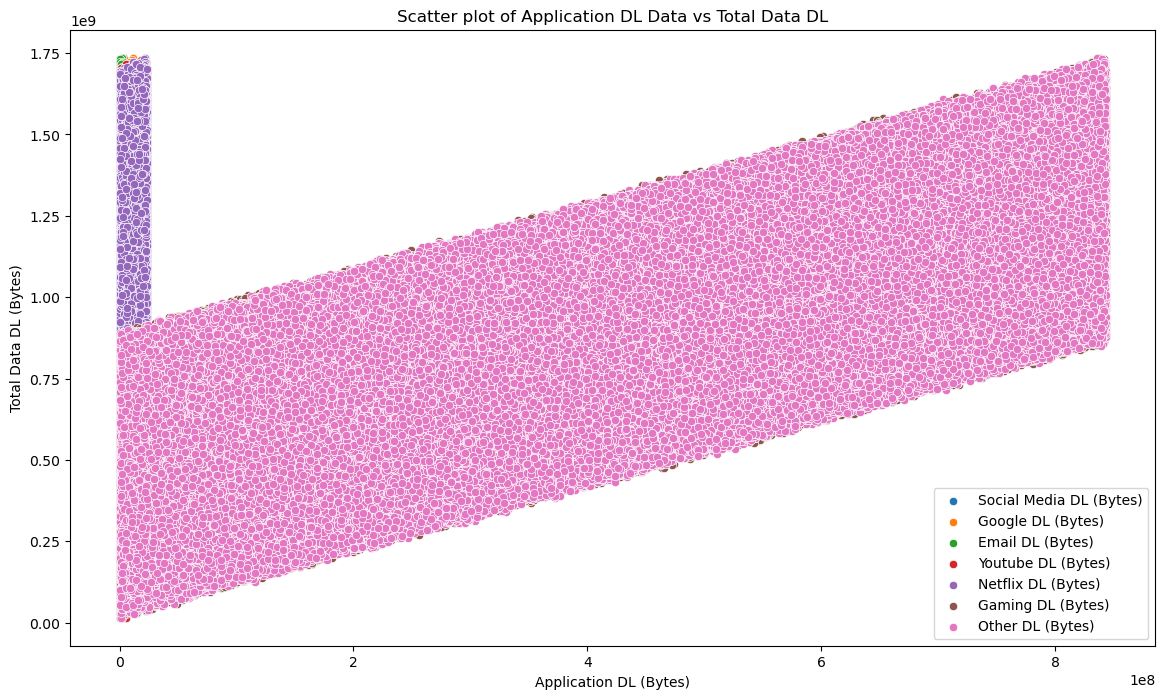

In [24]:
# Bivariate Analysis - Relationship between applications and total DL+UL data
app_cols = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
            'Other DL (Bytes)']
df['Total Data DL'] = df[app_cols].sum(axis=1)

plt.figure(figsize=(14, 8))
for col in app_cols:
    sns.scatterplot(x=df[col], y=df['Total Data DL'], label=col)
plt.title('Scatter plot of Application DL Data vs Total Data DL')
plt.xlabel('Application DL (Bytes)')
plt.ylabel('Total Data DL (Bytes)')
plt.legend()
plt.show()

                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)                0.000050

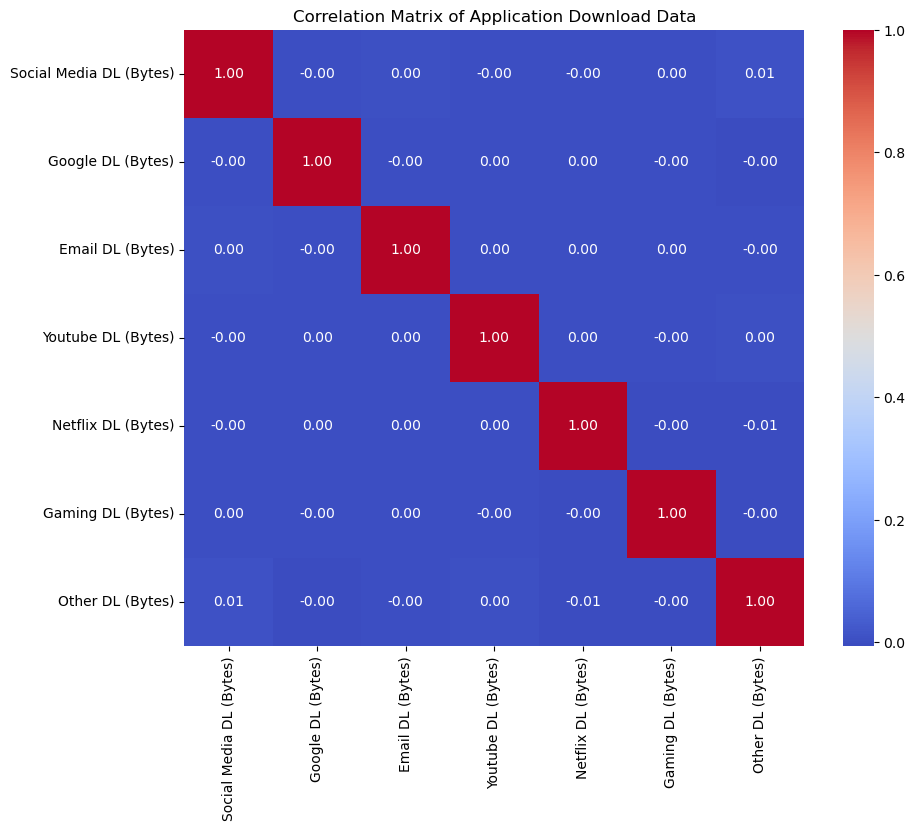

In [25]:
#  Correlation Analysis
correlation_matrix = df[app_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Application Download Data')
plt.show()

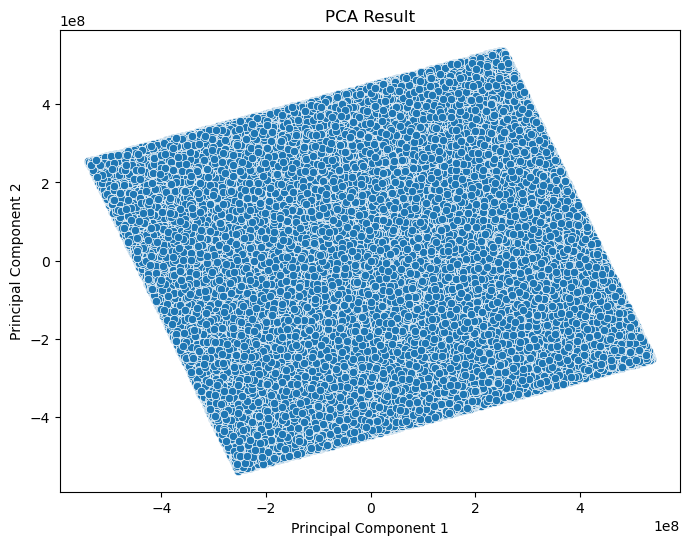

In [26]:
# Dimensionality Reduction - PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[app_cols].fillna(0))

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
# Interpretation of PCA Results
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio of the components: {explained_variance}")
print("1. PCA shows the principal components that explain the most variance in the data.")
print("2. Principal Component 1 and 2 together represent the majority of the variance.")
print("3. Reduced dimensions can help in simplifying the model while retaining essential information.")
print("4. PCA can be useful for visualizing high-dimensional data in 2D or 3D space.")


Explained variance ratio of the components: [0.501595   0.49753482]
1. PCA shows the principal components that explain the most variance in the data.
2. Principal Component 1 and 2 together represent the majority of the variance.
3. Reduced dimensions can help in simplifying the model while retaining essential information.
4. PCA can be useful for visualizing high-dimensional data in 2D or 3D space.
